# Example

Elements of Data Science

by [Allen Downey](https://allendowney.com)

[MIT License](https://opensource.org/licenses/MIT)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Cocoa bean production

This example is based on [this chart from Our World In Data](https://ourworldindata.org/grapher/cocoa-beans-production-by-region)

The following cell downloads the data:

In [2]:
# Get the data file

import os

filename = 'cocoa-beans-production-by-region.csv'
if not os.path.exists(filename):
    !wget https://github.com/AllenDowney/ElementsOfDataScience/raw/master/data/cocoa-beans-production-by-region.csv

Now we can read the data into a Pandas `DataFrame`.

In [3]:
df = pd.read_csv(filename)
df.head()

,Entity,Code,Year,"Crops - Cocoa, beans - 661 - Production - 5510 - tonnes"
0,Africa,NaN,1961,835368
1,Africa,NaN,1962,867170
2,Africa,NaN,1963,922621
3,Africa,NaN,1964,1190061
4,Africa,NaN,1965,874245


In [17]:
df.rename(columns={'Crops - Cocoa, beans - 661 - Production - 5510 - tonnes': 'Tons'})

,Entity,Code,Year,Tons,MTons
0,Africa,NaN,1961,835368,0.835368
1,Africa,NaN,1962,867170,0.867170
2,Africa,NaN,1963,922621,0.922621
3,Africa,NaN,1964,1190061,1.190061
4,Africa,NaN,1965,874245,0.874245
...,...,...,...,...,...
4634,World,OWID_WRL,2014,4757222,4.757222
4635,World,OWID_WRL,2015,4807505,4.807505
4636,World,OWID_WRL,2016,4714038,4.714038
4637,World,OWID_WRL,2017,5277863,5.277863


In [4]:
df.columns = ['Entity', 'Code', 'Year', 'Tons']
df.head()

,Entity,Code,Year,Tons
0,Africa,NaN,1961,835368
1,Africa,NaN,1962,867170
2,Africa,NaN,1963,922621
3,Africa,NaN,1964,1190061
4,Africa,NaN,1965,874245


In [5]:
df['MTons'] = df['Tons'] / 1e6
df['MTons'].describe()

count    4639.000000
mean        0.168764
std         0.508442
min         0.000000
25%         0.000499
50%         0.004300
75%         0.051492
max         5.277863
Name: MTons, dtype: float64

Here are the values in the `region` column.

In [6]:
df['Entity'].value_counts()

Southern Asia                      58
Malaysia                           58
Angola                             58
Guinea                             58
Dominica                           58
                                   ..
Pacific Islands Trust Territory    30
Micronesia (country)               24
Benin                              20
Martinique                         12
Tonga                              10
Name: Entity, Length: 84, dtype: int64

In [36]:
recent = df['Year'] == 2018

In [38]:
is_country = df['Code'].notna()

In [43]:
df[recent & is_country].sort_values(by='MTons', ascending=False).head(10)

,Entity,Code,Year,Tons,MTons
4638,World,OWID_WRL,2018,5252377,5.252377
1005,Cote d'Ivoire,CIV,2018,1963949,1.963949
1643,Ghana,GHA,2018,947632,0.947632
2149,Indonesia,IDN,2018,593832,0.593832
2993,Nigeria,NGA,2018,332927,0.332927
541,Cameroon,CMR,2018,307867,0.307867
483,Brazil,BRA,2018,239387,0.239387
1353,Ecuador,ECU,2018,235182,0.235182
3255,Peru,PER,2018,134676,0.134676
1237,Dominican Republic,DOM,2018,85139,0.085139


A pivot table has four parts:

1. Which variable goes down the rows?

2. Which variable goes across the columns?

3. Which variable are we summarizing?

4. How are we summarizing (or aggregating it)?

In this example, there is only one row for each Year/Country, so we don't really have to summarize.

In [44]:
pivot = pd.pivot_table(df, index='Year', columns='Entity', values='MTons')
pivot.head()

Entity,Africa,American Samoa,Americas,Angola,Asia,Belize,Benin,Bolivia,Brazil,Cameroon,...,Thailand,Timor,Togo,Tonga,Trinidad and Tobago,Uganda,Vanuatu,Venezuela,Western Africa,World
Year,,,,,,,,,,,,,,,,,,,,,
1961,0.835368,0.000005,0.328486,0.0004,0.008229,0.000017,NaN,0.0011,0.155901,0.0751,...,NaN,0.00002,0.01155,NaN,0.007030,0.000020,0.000663,0.016901,0.713760,1.186364
1962,0.867170,0.000007,0.318316,0.0004,0.008117,0.000002,NaN,0.0011,0.140363,0.0760,...,NaN,0.00002,0.01140,NaN,0.006715,0.000025,0.000810,0.018910,0.738910,1.213539
1963,0.922621,0.000010,0.328226,0.0003,0.008044,0.000058,NaN,0.0011,0.143495,0.0850,...,NaN,0.00002,0.01390,NaN,0.007322,0.000025,0.000940,0.020771,0.785840,1.280516
1964,1.190061,0.000002,0.321409,0.0003,0.008695,0.000050,NaN,0.0011,0.153685,0.0912,...,NaN,0.00002,0.01750,NaN,0.004716,0.000030,0.000515,0.020469,1.042087,1.544612
1965,0.874245,0.000005,0.322824,0.0004,0.008541,0.000055,NaN,0.0011,0.160823,0.0788,...,NaN,0.00002,0.01430,NaN,0.005062,0.000030,0.000696,0.020173,0.742652,1.229189


We can use Pandas to create a plot similar to the one in the article.

In [45]:
regions = ['Africa', 'Asia', 'South America', 'Central America', 'Oceania']
subset = pivot[regions]

The following function puts a label next to the data point for a given country.

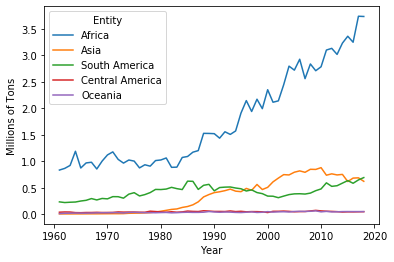

In [46]:
subset.plot()
plt.ylabel('Millions of Tons');

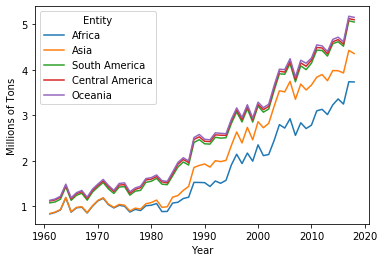

In [47]:
subset.plot(stacked=True)
plt.ylabel('Millions of Tons');

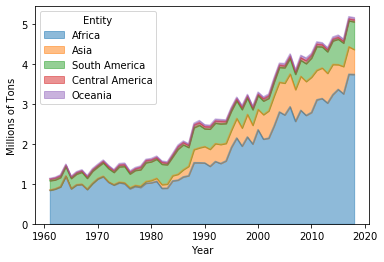

In [48]:
subset.plot(kind='area', stacked=True, alpha=0.5)
plt.ylabel('Millions of Tons');

In [54]:
countries = ["Cote d'Ivoire", 'Ghana', 'Indonesia', 'Nigeria', 'Cameroon', 'Togo']
subset = pivot[countries]

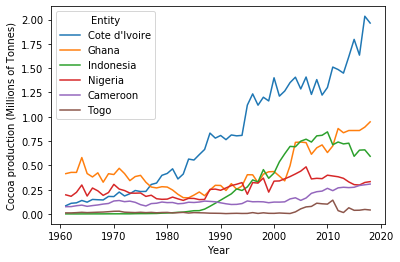

In [55]:
subset.plot()
plt.ylabel('Cocoa production (Millions of Tonnes)');

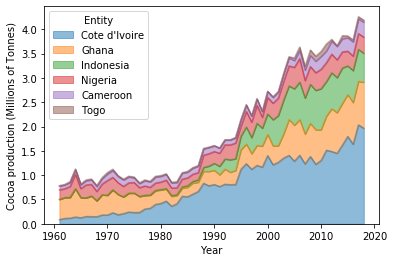

In [56]:
subset.plot(kind='area', stacked=True, alpha=0.5)
plt.ylabel('Cocoa production (Millions of Tonnes)');